### Objective

In this notebook, we are going to use the keras API in tensorflow to build a classification neural network to predict whether a credit card transaction is fraudulent or not.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions

### TABLE OF CONTENT

1. Install necessary packages
2. Load Data
3. Exploratory Analysis
4. Input and Target columns
5. Splitting Data
6. Scaling Data
7. Converting DataFrames to Tensors
8. Checking Shapes of features and labels
9. Model Creation and Training
10. Evaluating the model
    * Confusion matrix
    * Recall
    * ROC-AUC
    * plotting loss curves
       
11. Saving the model

### Install Necessary Libraries

In [ ]:
!pip install tensorflow --quiet

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(6,3)
matplotlib.rcParams['figure.facecolor']= '#00000000'

### Read Data

In [11]:
# let's load our data
credcard_df = pd.read_csv('C:\\Users\\TS\\Downloads\\archive\\creditcard.csv')

In [12]:
# view of our data
credcard_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
credcard_df.shape

(284807, 31)

the data contains 284807 rows and 31 columns

In [14]:
credcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
credcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Due to confidentiality issues, the original feature names have been hidden.

* Features V1, V2, … V28 are the principal components obtained with PCA.
* Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
* 'Amount' is the transaction Amount. 
* 'Class' is the response variable and it takes value 1 in case of fraud and 0 if otherwise.

In [16]:
credcard_df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [17]:
credcard_df.Class.value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

The fradulent transactions are only 0.17% of total transactions, making the dataset highly imbalanced. Ideally, a balanced dataset shoud have equal or almost equal number of samples for the posiive and negative class. 
Recall and ROC-AUC are some of the ppropriate metrics for measuring model performance of imbalanced datasets

### Input and Target Columns

The class column will be our label. That is the column we will be predicting, and the rest of the columns will be our features

In [18]:
# Input features
X=credcard_df.drop("Class", axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [19]:
#  Target column
y=credcard_df["Class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### Spliting The Data

We will split the data into training and test sets. we will train the model on the training set and test the performance of the model with the test set. 

80% will be used for training and 20% will be used for testing the model

In [21]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

The input features(X) has been split into two, X_train and X_test

X_train is the input features for the training data

X_test is the input features for the test set

target label(y) is also split into two, y_train and y_test

y_train is the target column for the training data

y_test is the target column for the test set

In [22]:
X_train.shape,  y_train.shape

((227845, 30), (227845,))

In [23]:
X_test.shape,  y_test.shape

((56962, 30), (56962,))

### Scaling the data

Because the Time and Amount columns have significantly different range of values, it is difficult to compare the weights of different columns to identify which features are more important. A column with larger range of inputs may dominate the optimization process.
CoLums V1, V2 up to V28 have been transformed by PCA. So those columns may have been scaled already.

We will scale the Time and Amount columns using the MinMaxScaler from Scikit-learn

In [24]:
# before scaling Time
credcard_df.Time.describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [25]:
# before scaling Amount
credcard_df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

The minimum value for Time is 0 and maximum is 172792

while minimum value for Amount is 0 and maximum is 25691.16

In [26]:
# scaling Time and Amount

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X[['Time', 'Amount']])

X_train[['Time', 'Amount']] = scaler.transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

In [27]:
# after scaling Time
X_train.Time.describe(), X_test.Time.describe()

(count    227845.000000
 mean          0.548593
 std           0.274830
 min           0.000000
 25%           0.313446
 50%           0.490225
 75%           0.806201
 max           1.000000
 Name: Time, dtype: float64,
 count    56962.000000
 mean         0.549210
 std          0.274823
 min          0.000000
 25%          0.314385
 50%          0.490014
 75%          0.806692
 max          0.999971
 Name: Time, dtype: float64)

In [28]:
# after scaling Amount
X_train.Amount.describe(), X_test.Amount.describe()

(count    227845.000000
 mean          0.003444
 std           0.009923
 min           0.000000
 25%           0.000218
 50%           0.000856
 75%           0.003001
 max           1.000000
 Name: Amount, dtype: float64,
 count    56962.000000
 mean         0.003419
 std          0.008948
 min          0.000000
 25%          0.000218
 50%          0.000856
 75%          0.003016
 max          0.389239
 Name: Amount, dtype: float64)

After scaling Time and Amount columns, minimum for both columsn is 0 while maximum is 1.
All values are between 0 and 1

### Converting Dataframes to tensor data

We will use the Keras API, which runs on Tensorflow, to build and train our deep learning model

A keras model will be faster if we pass a tensor data to it than if we pass a dataframe to it. We will convert our dataframes to a tensor data 

We will also cast the tensor data to floating-point numbers. Keras primarily operate on floating point numbers

In [29]:
# convert X_train to a tensor data
X_train = tf.constant(X_train)

# cast to float32
X_train = tf.cast(X_train, tf.float32)
print(X_train[:5])

tf.Tensor(
[[ 8.2962173e-01  1.9550409e+00 -3.8078272e-01 -3.1501284e-01
   3.3015546e-01 -5.0937426e-01 -8.6197451e-02 -6.2797791e-01
   3.5993721e-02  1.0545603e+00 -3.0441340e-02  6.2499577e-01
   1.6914957e+00  1.2557904e+00 -2.5326645e-01 -3.3169499e-01
   3.0725235e-01 -9.3084371e-01  6.5166581e-01  1.6798665e-01
  -1.2538999e-01  2.3819743e-01  9.6830493e-01  5.3208016e-02
  -2.7860150e-01 -4.4999301e-02 -2.1678033e-01  4.5168247e-02
  -4.7144793e-02  3.8884970e-04]
 [ 6.7811590e-01 -4.0097523e-01 -6.2694275e-01  1.5553389e+00
  -2.0177717e+00 -1.0776878e-01  1.6831048e-01  1.7959436e-02
  -4.0161911e-01  4.0378317e-02  6.1111516e-01 -1.9450700e+00
  -7.2659737e-01  1.0608879e+00 -1.1933471e+00  6.3105297e-01
  -1.6012348e-01 -1.6304436e+00  2.1068661e+00 -1.6927805e+00
  -4.7037151e-01 -1.5348509e-01  4.2170253e-01  1.1344188e-01
  -1.0040952e+00 -1.1766951e+00  3.6192405e-01 -3.7046883e-01
  -1.4479169e-01  1.7866067e-03]
 [ 8.6557829e-01  7.2509013e-02  8.2056564e-01 -5.61350

In [30]:
# convert y_train to a tensor data
y_train = tf.constant(y_train)

# cast to float32
y_train = tf.cast(y_train, tf.float32)
print(y_train[:5])

tf.Tensor([0. 0. 0. 0. 0.], shape=(5,), dtype=float32)


In [31]:
# convert X_test to a tensor data
X_test = tf.constant(X_test)

# cast to float32
X_test = tf.cast(X_test, tf.float32)
print(X_test[:5])

tf.Tensor(
[[ 2.40202099e-01 -1.65265064e+01  8.58497143e+00 -1.86498528e+01
   9.50559330e+00 -1.37938185e+01 -2.83240438e+00 -1.67016945e+01
   7.51734400e+00 -8.50705910e+00 -1.41101847e+01  5.29923630e+00
  -1.08340063e+01  1.67112029e+00 -9.37385845e+00  3.60805631e-01
  -9.89924622e+00 -1.92362919e+01 -8.39855194e+00  3.10173535e+00
  -1.51492345e+00  1.19073868e+00 -1.12767005e+00 -2.35857868e+00
   6.73461318e-01 -1.41369963e+00 -4.62762356e-01 -2.01857519e+00
  -1.04280412e+00  1.41756935e-02]
 [ 2.56151915e-01  3.39812070e-01 -2.74374533e+00 -1.34069517e-01
  -1.38572931e+00 -1.45141327e+00  1.01588655e+00 -5.24379075e-01
   2.24060372e-01  8.99746001e-01 -5.65011680e-01 -8.76702592e-02
   9.79426980e-01  7.68828169e-02 -2.17883810e-01 -1.36829585e-01
  -2.14289212e+00  1.26956061e-01  1.75266147e+00  4.32546228e-01
   5.06043911e-01 -2.13435844e-01 -9.42525029e-01 -5.26819170e-01
  -1.15699184e+00  3.11210513e-01 -7.46646702e-01  4.09958027e-02
   1.02037825e-01  2.02450957e

In [32]:
# convert to tensor data
y_test = tf.constant(y_test)

# cast to float32
y_test = tf.cast(y_test, tf.float32)
print(y_test[:5])

tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)


### Checking the shapes of our features and labels

In [33]:
X_train.shape, y_train.shape

(TensorShape([227845, 30]), TensorShape([227845]))

In [34]:
X_test.shape, y_test.shape

(TensorShape([56962, 30]), TensorShape([56962]))

In [35]:
# we increase the dimension of y_train and y_test to match with the dimension of X_train and X_test
y_train = tf.expand_dims(y_train, axis = -1)
y_test = tf.expand_dims(y_test, axis = -1)

In [36]:
X_train.shape, y_train.shape

(TensorShape([227845, 30]), TensorShape([227845, 1]))

In [37]:
X_test.shape, y_test.shape

(TensorShape([56962, 30]), TensorShape([56962, 1]))

### Model Creation and Training

In buildinng the model, we will use deep learning, a subset of machine learning that uses multiple layers of artificial neural networks to detect patterns and make decisions from the data.

We will use the Keras API, which runs on Tensorflow, to build and train our deep learning model. 

The Sequential class of the Keras API allows developers to build models by adding layers one after another in a linear stack. Each layer contains neuron(s) which serve as the processing units of the layers. 

The architecture of a neural network is made of 3 core layers.

* The Input  layer: The input layer accepts the raw data as input and then passes the input as an output to the next layer(hidden layer). There isnt any computation at the input layer stage. The input layer just specifies the kind of input the model should expect

* Hidden layer: This is where data is processed by neurons and an activation function before passing the output to the next hidden layer or output layer. Complex nueral networks may have more than one hidden layer. Each hiden layer has an activation function and may have more than one neuron.

* Output layer: This layer receives the output from the hidden layer, performs computation and gives out the final output(prediction).

**model creation stages**

1. creating the model: this is where we will piece together the layers of a neural network(and the activation function) using either the sequential or functionaal API

2. Compiling the model: this is where we define how a model's performance should be measured and how it should optimize. Here, we specify the loss function, the optimizer and a metric
   * loss function: The loss functon measures the model's performance by comparing the model's preditions to the actual target value at the end of each epoch
   * optimizer: the optimizer tries to improve the model by adjusting its parameters to minimize the loss function. It guides the neural network to find the most accurate               predictions
   * metric: metrics also evaluate how well a model is performing but the results from a metric are not used when training the model

3. Fitting the model:  This is where the model learns patterns in the data

In [38]:
# we will use the Keras Sequential API to build the model

# creating the model
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(30,)),                            # input layer with input shape of 30(30 columns expected)
    tf.keras.layers.Dense(120, activation=tf.keras.activations.relu),   # 1st hidden layer with 120 neeurons and a relu activation function
    tf.keras.layers.Dense(120, activation=tf.keras.activations.relu),   # 2nd hidden layer with 120 neeurons and a relu activation function
    tf.keras.layers.Dense(40, activation=tf.keras.activations.relu),   # 3rd hidden layer with 40 neeurons and a relu activation function
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)   # output layer with 1 neuron and a sigmoid activation function
])


In [39]:
# summary of the moel, showing all layers, output shapes and parameters of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 120)            │         3,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        14,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         4,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,121 (90.32 KB)

 Trainable params: 23,121 (90.32 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# plot of the model
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [41]:
# compiling the model
model.compile(loss=tf.keras.losses.binary_crossentropy,                # binary cross entropy loss function. suitable for binary classification problems
             optimizer=tf.keras.optimizers.Adam(),                     # Adam optimizer              
             metrics=[tf.keras.metrics.AUC(),
                      tf.keras.metrics.Recall()                        # recall metric
                     ])

In [42]:
# fitting the model
# We will icrease the class weight of the minority class 400times. 
# This will give the minority class a weight of 400*492=196,800
# which is not too far from the total number of samples of the majority class,284315

history=model.fit(X_train, y_train, epochs=15, class_weight={0:1, 1:400}, validation_data=(X_test, y_test), verbose=1)

Epoch 1/15
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 75s 10ms/step - auc: 0.9509 - loss: 0.5356 - recall: 0.8604 - val_auc: 0.9825 - val_loss: 0.0715 - val_recall: 0.8673
Epoch 2/15
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 58s 8ms/step - auc: 0.9805 - loss: 0.2661 - recall: 0.8985 - val_auc: 0.9850 - val_loss: 0.0464 - val_recall: 0.8980
Epoch 3/15
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 90s 9ms/step - auc: 0.9801 - loss: 0.2549 - recall: 0.9112 - val_auc: 0.9934 - val_loss: 0.0731 - val_recall: 0.9082
Epoch 4/15
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 79s 11ms/step - auc: 0.9886 - loss: 0.2017 - recall: 0.9315 - val_auc: 0.9906 - val_loss: 0.0372 - val_recall: 0.8980
Epoch 5/15
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - auc: 0.9865 - loss: 0.2381 - recall: 0.9340 - val_auc: 0.9858 - val_loss: 0.0908 - val_recall: 0.9388
Epoch 6/15
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 78s 9ms/step - auc: 0.9832 - loss: 0.5731 - recall: 0.9315 - val_auc: 0.9689 - val_loss: 0.0673 - val_recall: 0.9082
Epoch 7/15
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6

### Model Evaluation

earlier, we saw that our data is imbalanced; fraudulent transactions are only 0.17% of the entire data set

Due to this, we will use the following model assessment metrics:

1. Confusion matrix
2. recall
3. area under the ROC curve

#### Confusion matrix
A confusion matrix is a table that summarizes the performance of a classification model by comparing predicted labels to actual labels. The confusion matrix displays the four predicted outcomes of a machine learning classifier: true positives, true negatives, false positives, and false negatives. 

1. True Positives (TP): observations that are predicted as positive, and they are actually positive
2. True Negatives (TN): observations that are predicted as negetive, and they are actually negative
3. False Positives (FP): observations that are wrongly predicted as positive, but they are negative
4. False Negatives (FN): observations that are wrongly predicted as negative, but they are positive

In [43]:
# getting our predicted values
y_preds = model.predict(X_test)
y_preds

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step


array([[1.0000000e+00],
       [1.1330043e-05],
       [1.6644330e-07],
       ...,
       [5.2825794e-13],
       [1.8495445e-10],
       [4.5186865e-10]], shape=(56962, 1), dtype=float32)

In [44]:
# the confusion matrix will compare the predicted values with the 
# true labels to come out with the table of the four predicted outocmes

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, np.round(y_preds))
cm

array([[54550,  2314],
       [    8,    90]])

Text(0.5, 1.0, 'confusion matrix of model predictions')

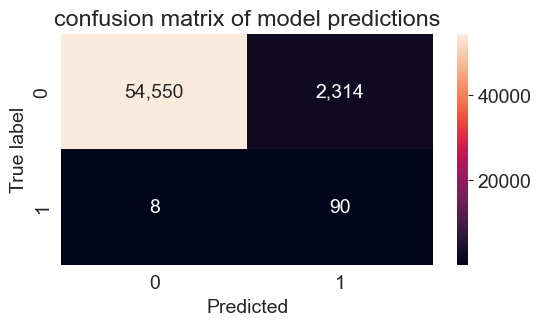

In [46]:
# let's make the confusion matrix more visually appealing with the use of a heatmap

sns.heatmap(cm, fmt=',d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('True label')
plt.title("confusion matrix of model predictions")

In [47]:
TP= cm[1,1]
TN= cm[0,0]
FP= cm[0,1]
FN= cm[1,0]

In [50]:
print('From the confusion matrix:')

print('True Positives (TP): observations that are predicted as positive, and they are actually positive =', TP)
print('True Negatives (TN): observations that are predicted as negetive, and they are actually negative =', TN)
print('False Positives (FP): observations that are wrongly predicted as positive, but they are negative =', FP)
print('False Negatives (FN): observations that are wrongly predicted as negative, but they are positive =', FN)


print('The total number of correct predictions by our model =', TP+TN)
print('The total number of incorrect predictions by our model =', FP+FN)

print('The sum of the numbers in all the boxes gives the total number of samples evaluated:', TP+TN+FP+FN)

From the confusion matrix:
True Positives (TP): observations that are predicted as positive, and they are actually positive = 90
True Negatives (TN): observations that are predicted as negetive, and they are actually negative = 54550
False Positives (FP): observations that are wrongly predicted as positive, but they are negative = 2314
False Negatives (FN): observations that are wrongly predicted as negative, but they are positive = 8
The total number of correct predictions by our model = 54640
The total number of incorrect predictions by our model = 2322
The sum of the numbers in all the boxes gives the total number of samples evaluated: 56962




#### Recall

**recall(True positive rate)**

It is the percentage of accurately predicted positives out of all actual positive samples in the dataset

recall = TP/(TP+FN)

In [51]:
# Recall can be computed from sklearn
from sklearn.metrics import recall_score
recall = recall_score(y_test, np.round(y_preds))
print("recall:", recall)

recall: 0.9183673469387755


In problems such as predicting fraud or detecting diabetes in patients, the aim is to detect as many positives as possible.
From the confusion matrix, the positive class size is 98.

Our model has detected 91 out of the 98 positive samples, which is about 93%. This 93% is the recall we calculated above. 

#### Area under the ROC curve

True positive rate is the percentage of actual positive cases that are correctly predicted by a model.

False positive rate is the percentage of incorrect positive predictions by the model.

ROC curve is graph that gives a visual representation of the trade-offs between the true positive rate and false positive rate at different treshholds. The AUC(Area Under curve) is a value between 0 and 1. This value is gotten from the ROC curve

* AUC values close to 1 implies the model is able to distintinguish between positive and negative classes
* AUC values close to 0 implies the model finds it difficult to differentiate between the two classes
* AUC values around 0.5 implies the model is mearly guessing. The model hasnt learnt any patterns in the data to enable it make redictions

In [52]:
# we can use sklearn's roc_curve to compute the true positive rate, false positive rate and the tresholds

from sklearn.metrics import roc_curve

# the roc curve function takes the predicted values and true y values as input
fpr, tpr, tresholds = roc_curve(y_test, y_preds)

In [53]:

# calculating the area under the curve
from sklearn.metrics import auc, roc_auc_score
auc = auc(fpr,tpr)
auc

np.float64(0.9703603585497227)

In [54]:
# alternatively, auc can be calculated using roc_auc_sscore
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_preds)
auc

np.float64(0.9703603585497227)

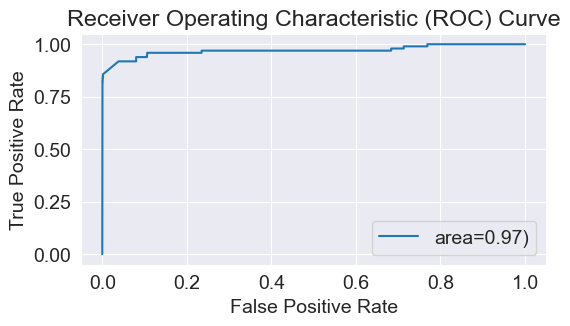

In [55]:
# plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='area=%0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The larger the area under the curve the better. A high auc value implies the model can effectively differentiate between positive and negative instances.

It implies the model is good at correctly classifying data points. 

In [56]:
 # model.evaluate returns the loss and metrics of the model
# the recall and auc of the model.evaluate are equal to the recall and auc we computed manually

model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - auc: 0.9636 - loss: 0.0557 - recall: 0.9184


[0.05572719871997833, 0.9636021256446838, 0.918367326259613]

In [57]:
# The history object returned by keras's model.fit contains the loss metrics at each epoch 

pd.DataFrame(history.history)

,auc,loss,recall,val_auc,val_loss,val_recall
0,0.950876,0.535618,0.860406,0.982499,0.071487,0.867347
1,0.980451,0.266070,0.898477,0.984987,0.046354,0.897959
2,0.980094,0.254911,0.911168,0.993358,0.073092,0.908163
3,0.988640,0.201663,0.931472,0.990589,0.037226,0.897959
4,0.986489,0.238148,0.934010,0.985780,0.090755,0.938776
5,0.983247,0.573130,0.931472,0.968942,0.067313,0.908163
6,0.989920,0.203322,0.946701,0.975085,0.044509,0.908163
7,0.992258,0.169210,0.959391,0.979335,0.176412,0.928571
8,0.995334,0.146808,0.964467,0.987463,0.120629,0.928571
9,0.994547,0.145481,0.967005,0.983503,0.079099,0.948980


#### plotting the loss curves

The loss curve gives us an idea of how our model is learning as it goes through each epoch


C:\Users\TS\AppData\Local\Temp\ipykernel_16992\110630755.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


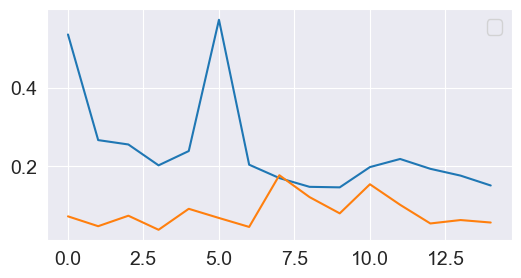

In [58]:
# loss cuves
# plt.figure(figsize=(10,5), dpi=250)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(loc='upper right')
plt.show();

### Checking for Overfitting and Underfitting

The auc and recall for the training data(99%, 97%) are not too different from the the auc and recall for the validation data(98%, 93%)

Also, from the plot of the loss curves, both training and validation loss curves follow a similar trend, implying a well fitted model.

### Saving our Model

We can save our model and reload for prediction later on

In [59]:
# saving the model
model.save('fraud_detection_model.keras')

In [60]:
loaded_model = tf.keras.models.load_model('fraud_detection_model.keras')

In [61]:
# predicting with loaded model
loaded_model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - auc: 0.9636 - loss: 0.0557 - recall: 0.9184


[0.05572719871997833, 0.9636021256446838, 0.918367326259613]

The loss, recall and auc of the loaded model is same as the original model

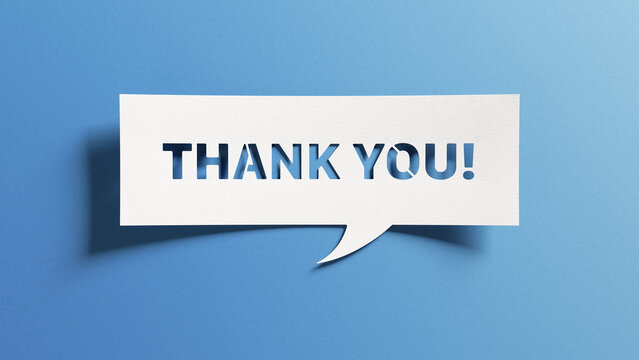